# GEOS 505: Problem Set 2

This problem set assesses some foundational abilities to create graphics that are appropriate to presentations and publications (broadly defined to be inclusive of technical reports, theses, etc.), using a combination of `NumPy` and `Matplotlib`.

__Instructions__: Complete the two problems below, which consist of creating publication-ready figures. Where you are asked to provide descriptive text and answer questions, please do so via well formatted Markdown cells below the problem. You are strongly encouraged to use both `Numpy` and `Matplotlib` documentation in developing your plots. Use of LLMs is accepted, but verify LLM-supplied code by consulting the documentation.

__Due Date and Time__: October 10, 2025 at 5:00 PM MT

__Turn In Via__: Commit and push your complete notebook to your personal GitHub repository for the class, and submit the URL for notebook via Canvas. 

## Setup

As part of your thesis, you are examining the potential influence of forest fires in the Upper Boise River Basin (UBRB) on hydrologic processes including snow accumulation/melt, soil moisture, and streamflow. You decide to start out by examining streamflow and want to get a sense of how much streamflow varies across two years, separated by 30 years. As such, you decide to examine streamflow from Water Years 1987 and 2017 (although you know the latter is a large snow year). __Instructions:__ Run the code cell below, altering only which gage you will use (choose 0-3, corresponding to the commented descriptions of the gages).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataretrieval import nwis

## Set parameters needed to retrieve data
startDate1 = '2016-10-01' # Water Year 2017
endDate1 = '2017-09-30'
startDate2 = '1986-10-01' # Water Year 1987
endDate2 = '1987-09-30'
parameterCode = '00060'

## Choose one of the following:
gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

my_gage = gages[2] # Choose 0-3

## Getting the Data

The function below takes as input the USGS gage ID (as a string, should be 8 digits), the start date, and the end date. It uses this information to query the USGS National Water Information System (NWIS) API to fetch the data that corresponds to the data request. It passes the fetched data back as a simplified `Pandas` dataframe containing only the date (as a `datetime` object) and the streamflow (in ft${}^3$/s). __Instructions:__ Run the cell below without modification. 

In [2]:
def GetStreamFlowData(gage, startDate, endDate, parameterCode):
    
    dailyStreamflow = nwis.get_dv(sites=gage, parameterCd=parameterCode, start=startDate, end=endDate)
    print('Retrieved ' + str(len(dailyStreamflow[0])) + ' data values for gage ' + gage)
    dt_output = dailyStreamflow[0].index
    q_output = dailyStreamflow[0]['00060_Mean'].values
    
    output_data = {
        'date': dt_output.strftime('%Y-%m-%d'),
        'q_cfs': q_output
    }
    
    df_out = pd.DataFrame(output_data)
    
    return df_out
    

## The Data and Analysis

The code below calls the `GetStreamFlowData(...)` function from above with the appropriate gage ID, start and end dates, and parameter code (`00060` for discharge/streamflow) and collects the data as a `Pandas` dataframe. __Instructions:__ Verify that the correct parameters are being supplied and run the code below.

In [3]:
wy1_streamflow = GetStreamFlowData(my_gage, startDate1, endDate1, parameterCode)
wy2_streamflow = GetStreamFlowData(my_gage, startDate2, endDate2, parameterCode)

year1 = (f"{startDate1[:4]}-{endDate1[:4]}")
year2 = (f"{startDate2[:4]}-{endDate2[:4]}")

Retrieved 365 data values for gage 13186000
Retrieved 365 data values for gage 13186000


## Instructions

Although you are towards the beginning of your research, you do need to demonstrate research progress. Your advisor has encouraged you to prepare a PowerPoint presentation the Pacific Northwest Water Summit in early November, and prepare some figures appropriate for a thesis proposal in the spring. As such, you need to efficiently create identical figures that are appropriate to both presentation and print formats. A manageable task that you can do by November is to plot both the empirical frequency distribution function (the histogram in frequency space) of the two years of streamflow data, as well as the associated cumulative density function (CDF). Your advisor agrees this is reasonable, but also wants you to highlight the mean of each year on the frequency distribution and the median flow, 5% non-exceedance, and 95% non-exceedance flows on the CDF. With this established you need a plan. __Your completed notebook should show 4 plots.__

#### Figure 1: Probability Density Plot

Compute the histograms of the daily streamflow data for each water year. We want to prepare a plot in which the frequency distributions share the same x-axis, so you'll need to do some sleuthing to figure out how you should use `np.histogram()`. You do some brainstorming and decide the plot should:

- Have all axes labelled, including units in SI format
- Have font sets and sizes that are appropriate to either a PowerPoint presentation or a print document
- Indicate the mean of each water year with a vertical line
- Use colors that are color-blind friendly
- Use gridlines appropriately
- Have a meaningful legend
- Save in a format like PNG

#### Figure 2: Cumulative Density Function Plot

With the histograms completed from above, you should now be able to calculate the CDF in a straightforward manner (you remember that the CDF is just the integral of the PDF from Probability and Statistics). So you come up with the requirements of the CDF plot, which are only slightly different than the PDF/histogram plot. You decide the plot should: 

- Have all axes labelled, including units in SI format
- Have font sets and sizes that are appropriate to either a PowerPoint presentation or a print document
- Indicate the median, 5%, and 95% non-exceedance values using both horizontal and vertical lines. Maybe do something fancy like intersect directly at the CDF. 
- Use colors that are color-blind friendly
- Use gridlines appropriately
- Have a meaningful legend
- Save in a format like PNG

At the very end of your 30-minute weekly advising check-in, your advisor closed their eyes, rubbed their temples intently, and spouted off the following `NumPy` and `Matplotlib` commands that should be helpful. 

In [4]:
np.cumsum() # Or x.cumsum(), where x is a vector of data
np.percentile() 
np.histogram() 
# Note: When using np.histogram(), make sure to use the same bins for both data records.
# Consider using min(), max(), and linspace() to create custom bins.

plt.hlines()
plt.vlines()

TypeError: cumsum() missing 1 required positional argument: 'a'

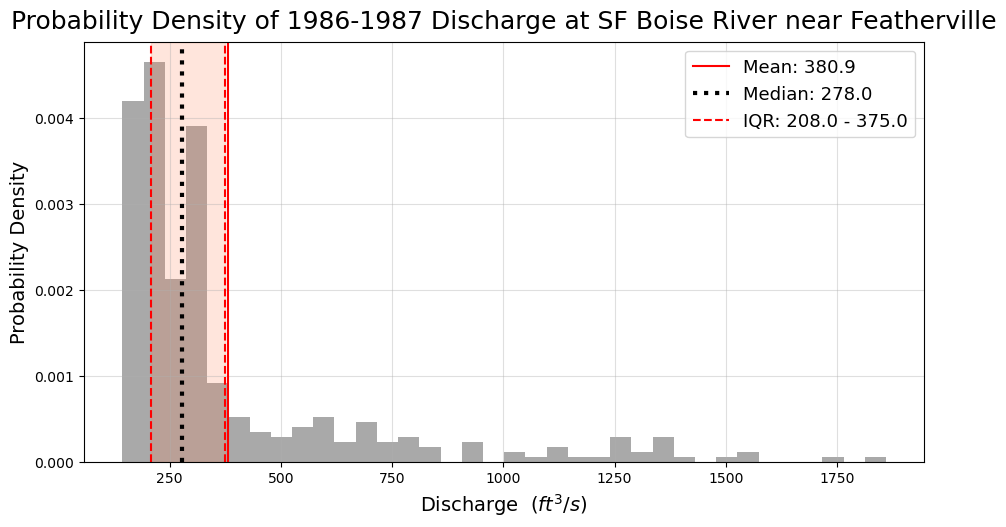

In [9]:
##Figure 1: Probability Density Plot 1987
flow2 = wy2_streamflow['q_cfs']
#np.histogram(wy1_streamflow['q_cfs'])
mean2 = np.mean(flow2)
q25 = np.percentile(flow2, 25)
q75 = np.percentile(flow2, 75)
q50 = np.percentile(flow2, 50)
#print(f'The mean CFS is: {mean1987:.2f}')

#need to build bins!
min_flow2 = flow2.min()
max_flow2 = flow2.max()
num_bins = 36 
bins2 = np.linspace(min_flow2, max_flow2, num_bins + 1)

fig = plt.figure(figsize=(12, 6)) # Create a figure object
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7]) # Create an axes object with offset and aspect ratio
ax.grid(True, alpha = 0.4)
plt.hist(flow2, bins = bins2, density = True, color = "darkgrey")
plt.axvline(mean2, color = "red", label = f"Mean: {mean2:.1f}")
plt.axvline(q50, linestyle = ":", color = "black", label = f"Median: {q50:.1f}", lw = 3)
plt.axvline(q25, linestyle = "--", color = "red", label = f"IQR: {q25:.1f} - {q75:.1f}")
plt.axvline(q75, linestyle = "--", color = "red", label = "_nolegend_")
plt.axvspan(q25, q75, alpha = 0.2, color = "coral")
plt.xlabel(r'Discharge $\ (ft^3/s)$', fontsize=14)
plt.ylabel('Probability Density', fontsize = 14)
plt.title(f"Probability Density of {year2} Discharge at SF Boise River near Featherville", fontsize=18, verticalalignment='bottom')
plt.legend(fontsize = 13)
plt.show()

#plt.plot(wy2_streamflow['date'], wy2_streamflow['q_cfs'])

This plot shows the probability density of each value of discharge in the 1987 water year. Initially, I tried to use 72 bins, so that under a uniform distribution each bin would contain 5 values for a given year. Simplifying this to 36 (10 in a bin) feels a little more appropriate and is just as interpretable. 

I determined that the mean, IQR, and median were meaningful statistics to provide in this visualization - particularly when we compare it to the 2017 water year. I was not expecting to see the mean flow rate fall outside of the IQR, but when compared to the time series, it feels a bit more appropriate. 

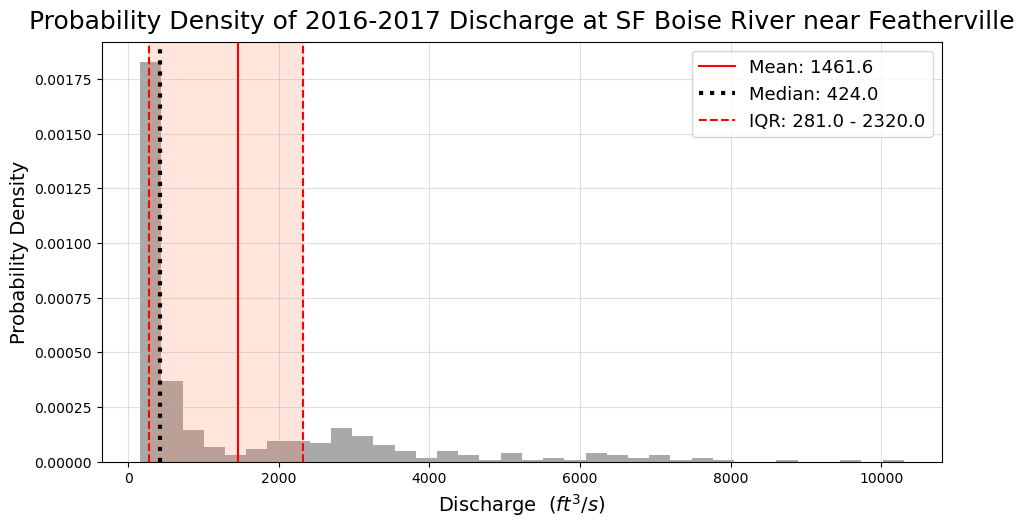

In [10]:
##Figure 1: Probability Density Plot 2017
flow1 = wy1_streamflow['q_cfs']

#collecting statistics about the flow
mean1 = np.mean(flow1) #mean
q25 = np.percentile(flow1, 25) #first quartile
q75 = np.percentile(flow1, 75) #third quartile
q50 = np.percentile(flow1, 50) #median

#need to build bins!
min_flow1 = flow1.min()
max_flow1 = flow1.max()
num_bins = 36 
bins1 = np.linspace(min_flow1, max_flow1, num_bins + 1)

fig = plt.figure(figsize=(12, 6)) # Create a figure object
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7]) # Create an axes object with offset and aspect ratio
ax.grid(True, alpha = 0.4) # add gridlines
plt.hist(flow1, bins = bins1, density = True, color = "darkgrey") #density = True makes it into a probability density function instead of a count histogram
plt.axvline(mean1, color = "red", label = f"Mean: {mean1:.1f}")
plt.axvline(q50, linestyle = ":", color = "black", label = f"Median: {q50:.1f}", lw = 3)
plt.axvline(q25, linestyle = "--", color = "red", label = f"IQR: {q25:.1f} - {q75:.1f}")
plt.axvline(q75, linestyle = "--", color = "red", label = "_nolegend_")
plt.axvspan(q25, q75, alpha = 0.2, color = "coral") #shades within the IQR
plt.xlabel(r'Discharge $\ (ft^3/s)$', fontsize=14)
plt.ylabel('Probability Density', fontsize = 14)
plt.title(f"Probability Density of {year1} Discharge at SF Boise River near Featherville", fontsize=18, verticalalignment='bottom')
plt.legend(fontsize = 13)
plt.show()

#Does it make sense when you look at the time series?
#plt.plot(wy1_streamflow['date'], wy1_streamflow['q_cfs'])


2017 must have been a wild water year - this gauge was measuring almost 10x the flow rate! Seeing that the median flow rate is much closer to the 1st quartile emphasizes this - half of the data is at or below 424 cubic ft/s, and the high 3rd quartile (higher than the max flow in 1987??) shows just how much water moved as the summer progressed. 

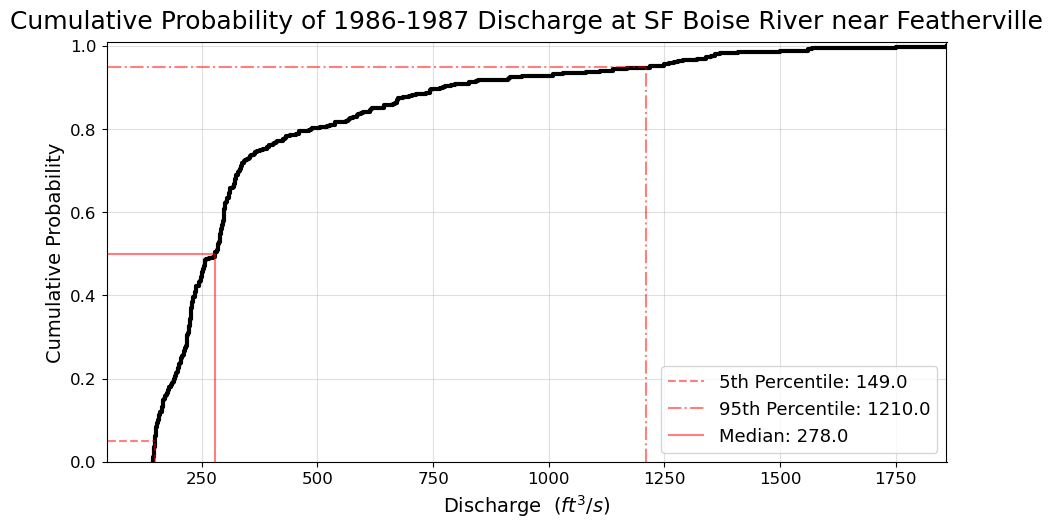

In [7]:
##Cumulative Density Plot 1987
#excedence values
ex2_05 = np.percentile(flow2, 5)
ex2_95 = np.percentile(flow2, 95)
ex2_50 = np.percentile(flow2, 50)

fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7]) # Create an axes object with offset and aspect ratio
ax.grid(True, alpha = 0.4)
plt.xlim(min_flow2-100, max_flow2)
plt.ylim(0,1.01)
plt.ecdf(flow2, color = "black", lw = 3)
plt.hlines(0.05, xmin = 0, xmax = ex2_05, color = "red", linestyles= "dashed", label = f"5th Percentile: {ex2_05:.1f}", alpha = 0.5, lw =1.5)
plt.hlines(0.95, xmin = 0, xmax = ex2_95, color = "red", linestyles= "dashdot", label = f"95th Percentile: {ex2_95:.1f}", alpha = 0.5, lw = 1.5)
plt.hlines(0.50, xmin = 0, xmax = ex2_50, color = "red", linestyles= "solid", label = f"Median: {ex2_50:.1f}", alpha = 0.5, lw = 1.5)
plt.vlines(ex2_05, ymin = 0, ymax = 0.05, color = "red", linestyles= "dashed", alpha = 0.5, lw = 1.5)
plt.vlines(ex2_95, ymin = 0, ymax = 0.95, color = "red", linestyles= "dashdot", alpha = 0.5, lw = 1.5)
plt.vlines(ex2_50, ymin = 0, ymax = 0.5, color = "red", linestyles= "solid", alpha = 0.5, lw = 1.5)
plt.xlabel(r'Discharge $\ (ft^3/s)$', fontsize=14)
plt.xticks(fontsize = 12)
plt.ylabel('Cumulative Probability', fontsize = 14)
plt.yticks(fontsize = 12)
plt.title(f"Cumulative Probability of {year2} Discharge at SF Boise River near Featherville", fontsize=18, verticalalignment='bottom')
plt.legend(loc = 'lower right', fontsize = 13)
plt.show()


Using plt.ecdf() feels like I am cheating! I could extract the probabilities from the bins of the PDF but this was a quick and efficient way to visualize the cumulative probability. 

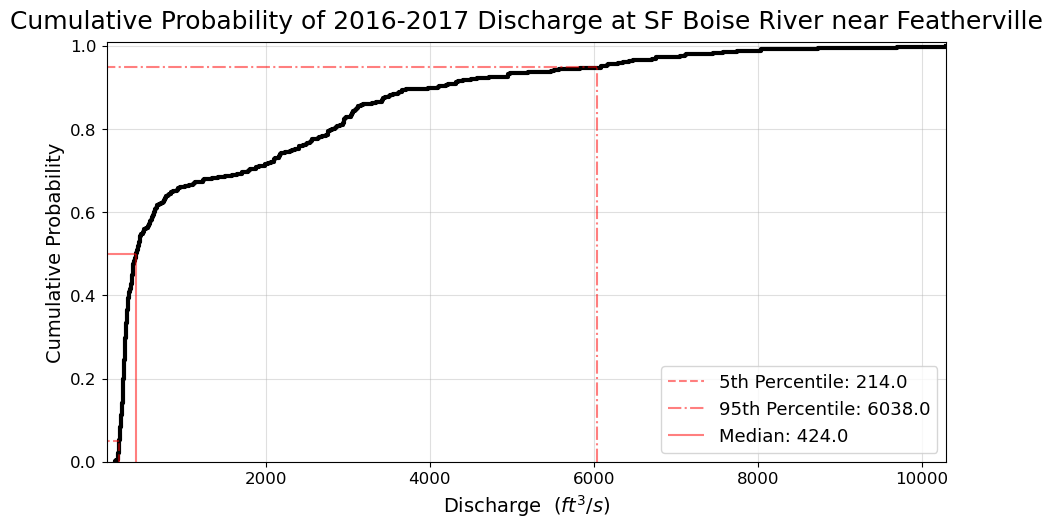

In [8]:
##Cumulative Density Plot 2017

#excedence values
ex_05 = np.percentile(flow1, 5)
ex_95 = np.percentile(flow1, 95)
ex_50 = np.percentile(flow1, 50)

fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7]) # Create an axes object with offset and aspect ratio
ax.grid(True, alpha = 0.4)
plt.xlim(min_flow1-100, max_flow1)
plt.ylim(0,1.01)
plt.ecdf(flow1, color = "black", lw = 3)
plt.hlines(0.05, xmin = 0, xmax = ex_05, color = "red", linestyles= "dashed", label = f"5th Percentile: {ex_05:.1f}", alpha = 0.5, lw =1.5)
plt.hlines(0.95, xmin = 0, xmax = ex_95, color = "red", linestyles= "dashdot", label = f"95th Percentile: {ex_95:.1f}", alpha = 0.5, lw = 1.5)
plt.hlines(0.50, xmin = 0, xmax = ex_50, color = "red", linestyles= "solid", label = f"Median: {ex_50:.1f}", alpha = 0.5, lw = 1.5)
plt.vlines(ex_05, ymin = 0, ymax = 0.05, color = "red", linestyles= "dashed", alpha = 0.5, lw = 1.5)
plt.vlines(ex_95, ymin = 0, ymax = 0.95, color = "red", linestyles= "dashdot", alpha = 0.5, lw = 1.5)
plt.vlines(ex_50, ymin = 0, ymax = 0.5, color = "red", linestyles= "solid", alpha = 0.5, lw = 1.5)
plt.xlabel(r'Discharge $\ (ft^3/s)$', fontsize=14)
plt.xticks(fontsize = 12)
plt.ylabel('Cumulative Probability', fontsize = 14)
plt.yticks(fontsize = 12)
plt.title(f"Cumulative Probability of {year1} Discharge at SF Boise River near Featherville", fontsize=18, verticalalignment='bottom')
plt.legend(loc = 'lower right', fontsize = 13)
plt.show()


That fifth percentile sure is small!

## Reflection Questions:

1. Your advisor is a scatter-brain and flaky. They tell you to try a different gage, and different years after you show them your beautiful plots. How easy would it be to accomodate their ephemeral requests and what did you do to make it relatively painless?
2. The function `GetStreamFlowData` above looks more broadly useful, in that you can query different gages, and request multiple years of data. In class, we talked a bit about "defensive coding." Looking at the function above, identify 3 different errors a user (you) might make in calling that function and how you might use some defensive programming strategies to protect against those errors.


1) I renamed all of my variables so they are either referencing year1 or year2, instead of the actual years in our example. Before, I was using flow2017 or min_flow1987, keeping track of which variables were coming from which wy#. This habit is an artifact of poorly running R code and I am trying to break it! I also added an fstring where the GetStreamFlowData function runs, which pulls and stores the years eg. year1 = (f"{startDate1[:4]}-{endDate1[:4]}"). This way, I can just change the input years and have the code produce the appropriate plots with the appropriate titles.

2) In the function, I would use a handful of assert functions to bound the start and end inputs for both water years, limit options for gages available, and to prevent them from using parameter codes we arent interested in. I could easily see entering the wrong parameter for the GetStreamFlowData function, or selected an incomplete water year (which can always be subsetted after retrieval), or used a gage that didn't collect data. I've included some examples of that below. 

In [ ]:
# Limit my_gage to the 4 shown in gages
gage_index = 3  # Choose 0-3
assert 0 <= gage_index < len(gages), f"gage_index must be between 0 and {len(gages)-1}, got {gage_index}"
my_gage = gages[gage_index]

# Limit parameterCode to allowed values
allowed_parameter_codes = ['00060']  # Add more codes if needed
parameterCode = ['00050']
assert parameterCode in allowed_parameter_codes, f"parameterCode must be one of {allowed_parameter_codes}, got {parameterCode}"

# Check the first water year
assert startDate1[5:] == '10-01', f"startDate1 must be October 1st (YYYY-10-01), got {startDate1}"
assert endDate1[5:] == '09-30', f"endDate1 must be September 30th (YYYY-09-30), got {endDate1}"

# Check the second water year
assert startDate2[5:] == '10-01', f"startDate2 must be October 1st (YYYY-10-01), got {startDate2}"
assert endDate2[5:] == '09-30', f"endDate2 must be September 30th (YYYY-09-30), got {endDate2}"